# WDSA-CCWI 2022
# <font color='blue'> TSNet Short Tutorial
 

## Example 6: TNet3 - Burst with and w/o surge tanks

In this example we will use Tnet3 to demonstrate the effect of using surge tanks in the system


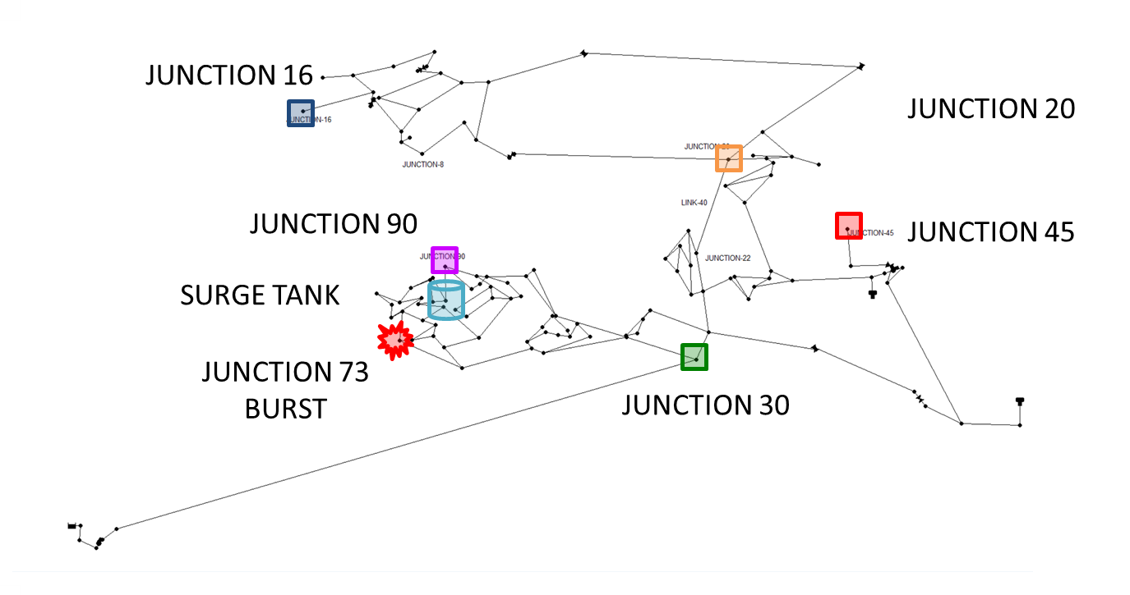

### Import packages

In [1]:
import tsnet
import matplotlib.pyplot as plt
import numpy as np

### Burst event at JUNCTION-73 without surge tank

In [2]:
#-------------------------------------------------
# open an example network and create a transient model
inp_file = 'networks/Tnet3.inp'
tm = tsnet.network.TransientModel(inp_file)

# Set wavespeed
#-------------------------------------------------
wavespeed = 1200
tm.set_wavespeed(wavespeed)

# Set time step
#-------------------------------------------------
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-73', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or Epanet
tm = tsnet.simulation.Initializer(tm, t0, engine)

# Transient simulation
#-------------------------------------------------
result_obj = 'Tnet3_wo_surge_tank' # name of the object for saving simulation results
tm_wo_st = tsnet.simulation.MOCSimulator(tm,result_obj)

C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\tsnet\lib\site-packages\wntr\epanet\io.py:2085: UserWarning: Not all curves were used in "networks/Tnet3.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Simulation time step 0.01154 s
Total Time Step in this simulation 1732
Estimated simulation time 0:01:25.488056
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


### Burst event at JUNCTION-73 with closed surge tank

In [3]:
#-------------------------------------------------

tm = tsnet.network.TransientModel(inp_file)

# Set wavespeed
#-------------------------------------------------
tm.set_wavespeed(wavespeed)

# Set time step
#-------------------------------------------------
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-73', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or Epanet
tm = tsnet.simulation.Initializer(tm, t0, engine)

# add air chamber
#-------------------------------------------------
tank_node = 'JUNCTION-89'
tank_area = 10   # tank cross sectional area [m^2]
tank_height = 10  # tank height [m]
water_height = 9  # initial water level [m]
tm.add_surge_tank(tank_node, [tank_area,tank_height,water_height], 'closed')

# Transient simulation
#-------------------------------------------------
result_obj = 'Tnet3_w_c_surge_tank' # name of the object for saving simulation results
tm_w_cst = tsnet.simulation.MOCSimulator(tm,result_obj)

Simulation time step 0.01154 s
Total Time Step in this simulation 1732
Estimated simulation time 0:02:40.234248
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


### Burst event at JUNCTION-73 with open surge tank

In [4]:
tm = tsnet.network.TransientModel(inp_file)

# Set wavespeed
#-------------------------------------------------
tm.set_wavespeed(wavespeed)

# Set time step
#-------------------------------------------------
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-73', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or Epanet
tm = tsnet.simulation.Initializer(tm, t0, engine)

# add open surge tank
#-------------------------------------------------
tank_node = 'JUNCTION-89'
tank_area = 10   # tank cross sectional area [m^2]
tm.add_surge_tank(tank_node, [tank_area], 'open')

# Transient simulation
result_obj = 'Tnet3_w_o_surge_tank' # name of the object for saving simulation results
tm_w_ost = tsnet.simulation.MOCSimulator(tm,result_obj)

Simulation time step 0.01154 s
Total Time Step in this simulation 1732
Estimated simulation time 0:02:46.330888
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


### Get results

- Plot no, closed and open surge tank

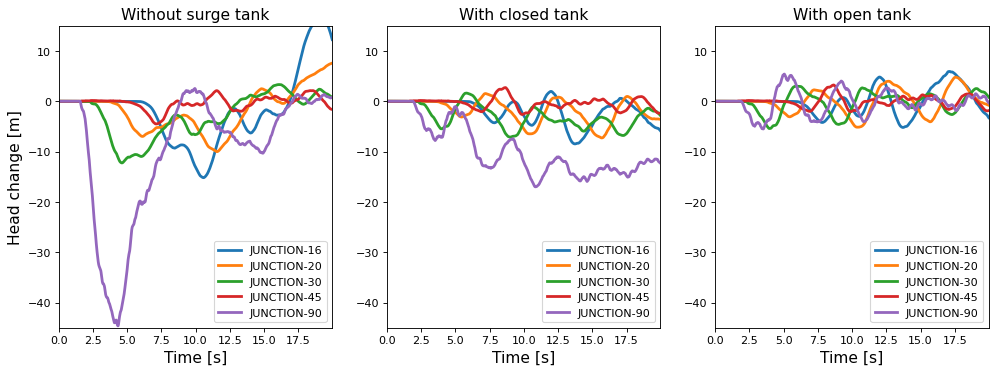

<Figure size 432x288 with 0 Axes>

In [6]:
# report results
import matplotlib.pyplot as plt
node1 = 'JUNCTION-16'
node2 = 'JUNCTION-20'
node3 = 'JUNCTION-30'
node4 = 'JUNCTION-45'
node5 = 'JUNCTION-90'
fig, axs = plt.subplots(1,3,figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
axs[0].plot(tm_wo_st.simulation_timestamps,tm_wo_st.get_node(node1).head-tm_wo_st.get_node(node1).head[0],'C0-',label='JUNCTION-16', linewidth=2.5)
axs[0].plot(tm_wo_st.simulation_timestamps,tm_wo_st.get_node(node2).head-tm_wo_st.get_node(node2).head[0],'C1-',label='JUNCTION-20', linewidth=2.5)
axs[0].plot(tm_wo_st.simulation_timestamps,tm_wo_st.get_node(node3).head-tm_wo_st.get_node(node3).head[0],'C2-', label='JUNCTION-30',linewidth=2.5)
axs[0].plot(tm_wo_st.simulation_timestamps,tm_wo_st.get_node(node4).head-tm_wo_st.get_node(node4).head[0],'C3-', label='JUNCTION-45',linewidth=2.5)
axs[0].plot(tm_wo_st.simulation_timestamps,tm_wo_st.get_node(node5).head-tm_wo_st.get_node(node5).head[0],'C4-',label='JUNCTION-90', linewidth=2.5)
axs[0].set_xlim([tm_wo_st.simulation_timestamps[0],tm_wo_st.simulation_timestamps[-1]])
axs[0].set_ylim([-45,15])
axs[0].set_xlabel("Time [s]", fontsize=14)
axs[0].set_ylabel("Head change [m]", fontsize=14)
axs[0].legend(loc='best')
axs[0].set_title('Without surge tank', fontsize=14)

axs[1].plot(tm_w_cst.simulation_timestamps,tm_w_cst.get_node(node1).head-tm_w_cst.get_node(node1).head[0],'C0',label='JUNCTION-16', linewidth=2.5)
axs[1].plot(tm_w_cst.simulation_timestamps,tm_w_cst.get_node(node2).head-tm_w_cst.get_node(node2).head[0],'C1',label='JUNCTION-20', linewidth=2.5)
axs[1].plot(tm_w_cst.simulation_timestamps,tm_w_cst.get_node(node3).head-tm_w_cst.get_node(node3).head[0],'C2',label='JUNCTION-30', linewidth=2.5)
axs[1].plot(tm_w_cst.simulation_timestamps,tm_w_cst.get_node(node4).head-tm_w_cst.get_node(node4).head[0],'C3',label='JUNCTION-45', linewidth=2.5)
axs[1].plot(tm_w_cst.simulation_timestamps,tm_w_cst.get_node(node5).head-tm_w_cst.get_node(node5).head[0],'C4',label='JUNCTION-90', linewidth=2.5)
axs[1].set_xlim([tm_wo_st.simulation_timestamps[0],tm_wo_st.simulation_timestamps[-1]])
axs[1].set_ylim([-45,15])
axs[1].set_xlabel("Time [s]", fontsize=14)
axs[1].legend(loc='lower right')
axs[1].set_title('With closed tank', fontsize=14)

axs[2].plot(tm_w_ost.simulation_timestamps,tm_w_ost.get_node(node1).head-tm_w_ost.get_node(node1).head[0],'C0',label='JUNCTION-16', linewidth=2.5)
axs[2].plot(tm_w_ost.simulation_timestamps,tm_w_ost.get_node(node2).head-tm_w_ost.get_node(node2).head[0],'C1',label='JUNCTION-20', linewidth=2.5)
axs[2].plot(tm_w_ost.simulation_timestamps,tm_w_ost.get_node(node3).head-tm_w_ost.get_node(node3).head[0],'C2',label='JUNCTION-30', linewidth=2.5)
axs[2].plot(tm_w_ost.simulation_timestamps,tm_w_ost.get_node(node4).head-tm_w_ost.get_node(node4).head[0],'C3',label='JUNCTION-45', linewidth=2.5)
axs[2].plot(tm_w_ost.simulation_timestamps,tm_w_ost.get_node(node5).head-tm_w_ost.get_node(node5).head[0],'C4',label='JUNCTION-90', linewidth=2.5)
axs[2].set_xlim([tm_wo_st.simulation_timestamps[0],tm_wo_st.simulation_timestamps[-1]])
axs[2].set_xlabel("Time [s]", fontsize=14)
axs[2].set_ylim([-45,15])
axs[2].legend(loc='lower right')
axs[2].set_title('With open tank', fontsize=14)

plt.show()
plt.tight_layout()
fig.savefig('./networks/Tnet3_burst_surge_tanks.pdf', format='pdf',dpi=100)